# 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt

# Overflow and Underflow
Okay so we are going to go in the computer science route from now own, so examples can be a little more easy to see as we are in a computer :D (if you print this you are my GOAT). This topic actually is not about the wonderful world of computer science, but we are going to talk about its limitations. And the first limitations is the continouos, in math continuous is well defined for abundant of topics, but in computer science the continuous as right now (2024 :D) is not possible to represent in a computer, and why, because of computers are done.

Suppose we have the number $\pi$, we know that first is an infinite rational number, thus if we continue to search for decimals of $\pi$ will never, ever, end. But what is pi in python

In [2]:
print(np.pi)

3.141592653589793


## 15 digits OMG, how can we trust computers if they can only give us 15 digits of $\pi$
Funny enough NASA uses only 15 digits to do their calculations hehe. As humans we are not infinite and sadly there has not been a computer science experiment that could grasp infinity, why? well computer are limited to what they can do.

If you search your computer specifications you can see there is a number that represents the architecture of you computer, usually 64 bits, what does that mean, well is kinda of what it says, computers can only handle 64 bits. What is a bit, a bit is the most simple data structure that a computer has, in our computers, a simple a 0 or 1 (we are going to pass quantum computers, please research more about another possible types of bits)

Many can question, how can a computer do all that we do with only that little bit of information, well, imagine 64 bits combined, how many possible messages can we do with that

In [3]:
2**64

18446744073709551616

Well that many, that is a lot of information!! But suppose that we fill all of those $2^{64}$ messages, if we would like to add a simple extra message, computers cannot handle it. That is its limitation. Suppose that we want more digits of pi and we set up a string of information that has 64 bits and each of it is a digit of $\pi$ in this hypothetical first we must change $\pi$ to binary, and we get

In [4]:
pi_bin = "11.0010010000111111011010101000100010000101101000111001"
print(pi_bin)

11.0010010000111111011010101000100010000101101000111001


In [5]:
print(len(pi_bin))

55


right now we are using 55 bits, only for pi, suppose we with some advance virtual machine can set up a longer representation of pi

In [6]:
pi_bin_64 = "11.0010010000111111011010101000100010000101101000111000011011011"
print(pi_bin_64)

11.0010010000111111011010101000100010000101101000111000011011011


In [7]:
print(len(pi_bin_64))

64


That is that all the computer can handle as pi, and it will give a lot of problems when using it (that's why numpy uses less bits), that is it's limitation, if don't believe me and say oh but you are using only one byte(a string of 64 bits), suppose that you use $2^{64}$ bits, then okay you are going to have 18446744073709551616 digits of binary pi. Not enough to represent infinite. That is the limitation of computers, they are discrete. This is not a rant, as most of the things in our world are done based on discretization of continuous variables, not only for computers. 

But we have to be aware of this type of limitations, and I am going to give you many examples of where this issue happens

In [8]:
print(0.5000000000000000001+0.5)

1.0


In [9]:
print(1/3+0.00000000000002)

0.3333333333333533


In [10]:
print(1/3+0.000000000000000002)

0.3333333333333333


Python uses 55 bits for double precision of numbers, meaning that everything over that is not considered

In [11]:
0.000000000000001+1

1.000000000000001

In [12]:
0.0000000000000001+1

1.0

As you can see python will consider the first number as 0, but... is not zero, that issue is called **underflow**, where the precision of a algorithm overpasses the precision of the results thus the computer only dismissed the values outside of the precision

So we learn about under flow, but what about the contrary, when numbers are to big, where as could see, python does not understand what is infinite, so there must be the biggest number that python can handle, well even though that is true, python uses a trick to handle those and maybe I was a little bit misleading with past information, underflow is only truth for floats (or decimals), but with integers, python uses strings to handles those cases. So you can have this

In [13]:
102039018239123919239128390 + 90182391829389184924

102039108421515748628313314

There is a problem though, we have to put a limit to what we learn and what we compute, the idea of overflow is when big numbers are starting to work as infinity in our algorithms, suppose we have a computer that only has 2^32 bits of space, so when a number passes 2^30 then we consider for it to be infinity, that is not true and it will never be, but that limitation makes us reach **overflow**. 

# Poor conditioning
This kinda of topic is quite different as before as we are going to talk about some mistakes we are going to do when defining certain algorithms, the idea is that imagine that we have a case where we are going to take an input, and we have a matrix that maps that input to a value. If we define that matrix in a certain way we might get unexpected results if we don't control it. You can see this here

In [14]:
a = np.array([[10000,1],[1,0.00001]])
print(np.linalg.cond(a)) 

111111113.33333334


and suppose we have to solve $x = A^{-1}b$
the inverse of the matrix is

In [15]:
print(np.linalg.inv(a))

[[-1.11111111e-05  1.11111111e+00]
 [ 1.11111111e+00 -1.11111111e+04]]


as you can see the values are really constraint by precision and solving this issue for really small values can simply result in falsehoods. Do you know a really good example... overfitting, I am getting ahead of myself but suppose that you want to train for some data, and in the end you found a model for the prescence of the points, you get the model and has amazing results for your points, but when you try to find a value that is outside that dataset, you model does not work, then you condition is very high, because a small change of inputs results in a catastrofic change, I am going to make an example with this, the experiment is to test a new instrument and no matter what value we enter as x we must get 2.

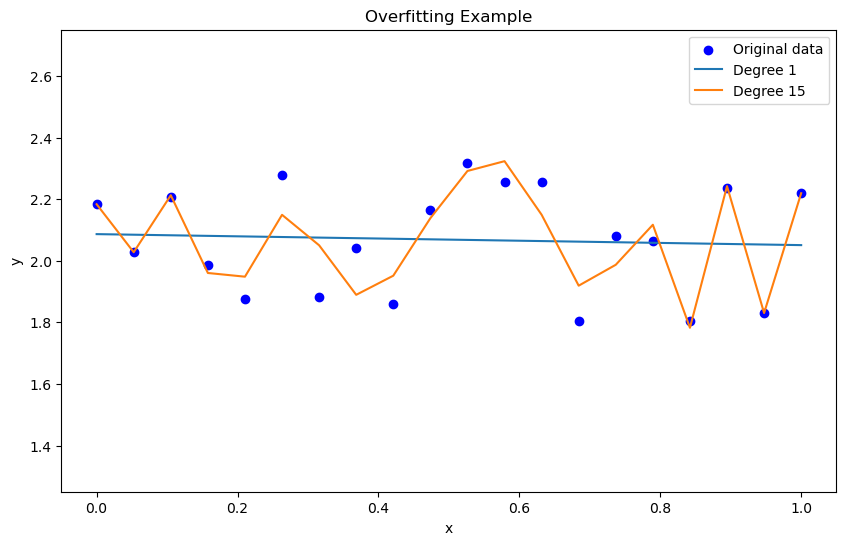

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n):
    x = np.linspace(0, 1, n)
    y = np.array([2+ (-1)**(np.random.randint(2))*np.random.random()/3 for i in range(n)])
    return x, y

def fit_polynomial(x, y, degree):
    p = np.polyfit(x, y, degree)
    return np.poly1d(p)

def plot_overfitting():
    x, y = generate_data(20) 
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Original data')
    degrees = [1, 15]
    for degree in degrees:
        poly_model = fit_polynomial(x, y, degree)
        plt.plot(x, poly_model(x), label=f'Degree {degree}')

    plt.title('Overfitting Example')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([1.25,2.75])
    plt.legend()
    plt.savefig("deep_learning.png")
    plt.show()

# Call the function to generate the plot
plot_overfitting()

We have some data that are the points in blue right?, if you have to make an educated guess knowing that the values have a stadistical driff(meaning all values must be the same number in this case 2, but because of experimentation we did not get that value), what is the best curve that represents the data. Would you say the orange one? or the blue one?  maybe the best one to match those points is the orange one, but if you look closely, suppose you enter the value $x = 0.1$, because of the experiment you expect for it to be 2,but actually is ~2.4, but if you take the blue line the value approximates a lot to 2. That is essentially overfitting, creating a model (in this case a curve) to represent the data but not reality

So the condition is very high as we cannot expect out model to predict well, that is poor conditioning case

# Gradient-based optimization
Okay so right now we might be entering the first topic that you learn in numerical methods that is crucially related to machine learning, meaning by crucially related as everywhere you read about neural networks or deep learning, you are going to hear about optimization based on an algorithm.

Well let's start by putting ourselves in context. Suppose that we have a function, and we don't know where the minimum is, but we really need to minimize it, often the problems that machine learning has is optimizing something, minimizing the error, maxing the accuracy and precision, optimizing metrics, etc. So let's start simple.

Suppose we have a simple curve,

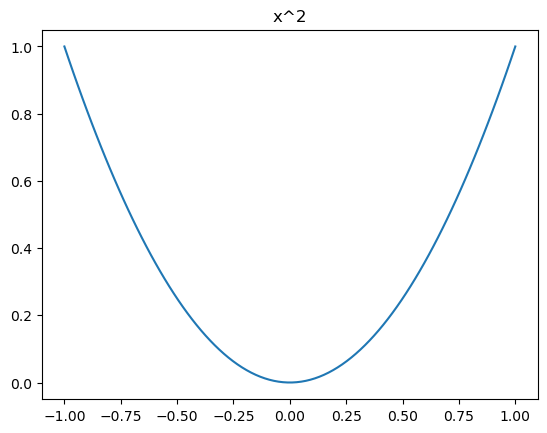

In [17]:
x = np.linspace(-1,1,100)
y = x**2
plt.title("x^2")
plt.plot(x,y)

We know derivatives right, so simple $\frac{d}{dx} x^2 = 2x $  so the minimun is at $2x=0 \implies x=0$

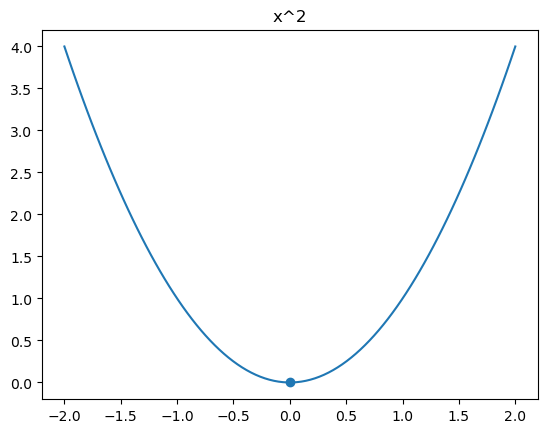

In [18]:
x = np.linspace(-2,2,100)
y = x**2
plt.title("x^2")
plt.scatter(0,0)
plt.plot(x,y)

Cool we reached the minimum, next topic. Just kidding (hehe bad joke), suppose that we never knew how the function is or that that $f'(x) = 0 $ is the minimum, is something that we never were taught, but we have 3 important pieces of information
- The function is $f(x) = x^2$
- The derivative is $ f'(x) = 2x$
- It has only one minimun (this might be not be important for this example but in the future is gonna come in handy)

So we are gonna use this strategy
- Pick a starting point inside the curve
- We are going to take very small steps that is going to make us closer to the minimum, that means that every step that we take, in this case move $\epsilon$, we must have $f(x)>f(x+\epsilon)$
- We are going to stop the moment that we cannot get closer to the minimum meaning that after we decide how we pick the epsilon we stop the moment that $f(x)<f(x+\epsilon)$

So let's start in a very simple way first as we have the liberty to picking any starting point, let's pick (1,1).

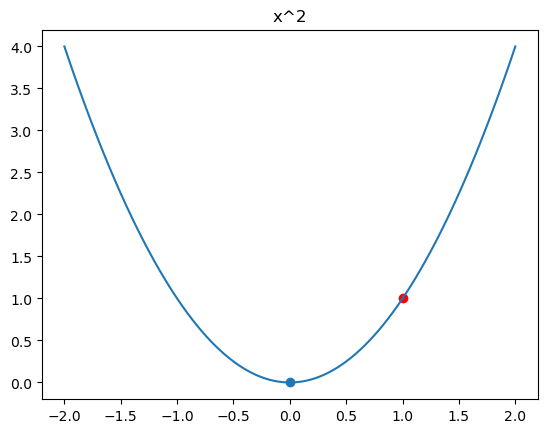

In [19]:
x = np.linspace(-2,2,100)
y = x**2
plt.title("x^2")
plt.scatter(1,1,color='r')
plt.scatter(0,0)
plt.plot(x,y)

### Lets go step by step
How do we pick epsilon? we could start by experimenting some values, let's make $\epsilon = 2$ what is the next step? well
$$\epsilon = 2$$
$$f(x+2) = f(1+2) = f(3) = 9 $$ then our step is

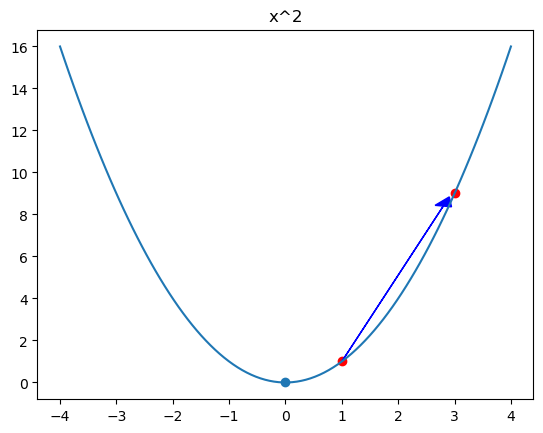

In [20]:
x = np.linspace(-4,4,100)
y = x**2
plt.title("x^2")
plt.scatter(1,1,color='r')
plt.arrow(1,1,1.8,7.4,color = "blue",head_width=0.3)
plt.scatter(0,0)
plt.scatter(3,9,color='r')
plt.plot(x,y)

So that did not help... :D. First we made a mistake when we setup epsilon as 
$$f(1) = 1 < 9 = f(1+2)$$
Thus that epsilon did now worked. Let's try with another


Let's make $\epsilon = -1.5$ 
$$f(x-1.5) = f(1-1.5) = f(-0.5) = 0.25 $$ then our step is

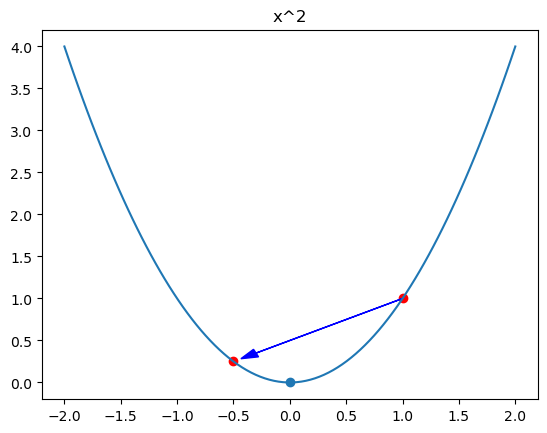

In [21]:
x = np.linspace(-2,2,100)
y = x**2
plt.title("x^2")
plt.scatter(1,1,color='r')
plt.arrow(1,1,-1.3,-0.65,color = "blue",head_width=0.1)
plt.scatter(0,0)
plt.scatter(-0.5,0.25,color='r')
plt.plot(x,y)

This looks better! And for the first step it works that
$$f(1)=1>0.25=f(-0.5^2)$$

Let's keep going it looks promising
$$f(-0.5-1.5) = f(-2)=4$$

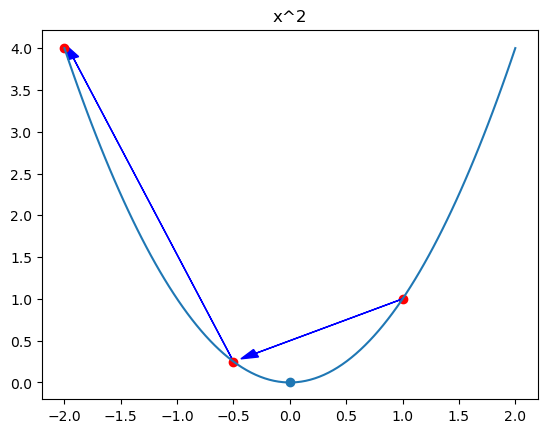

In [22]:
x = np.linspace(-2,2,100)
y = x**2
plt.title("x^2")
plt.scatter(1,1,color='r')
plt.arrow(1,1,-1.3,-0.65,color = "blue",head_width=0.1)
plt.arrow(-0.5,0.25,-1.42,3.63,color = "blue",head_width=0.1)
plt.scatter(0,0)
plt.scatter(-0.5,0.25,color='r')
plt.scatter(-2,4,color='r')
plt.plot(x,y)

Okay... that did not worked... let's see what went wrong
$$f(-0.5)=0.25<4=f(-0.5-1.5)=f(-2)$$
Ohh so this epsilon did not worked. Let's keep trying but using a new approach, maybe an epsilon that is always getting smaller could work, we could use 
$$\epsilon = (-1)^n\frac{3}{2*n+1}$$
where n is the step we take, this might look as a big leap of previous steps, but we are just using this series
$$ -\frac{3}{2}, \frac{3}{4},-\frac{3}{8}, \frac{3}{16},...$$

This are the steps
1. $$f(1) = 1$$
2. $$f(1-3/2) = f(-0.5) = 0.25$$
3. $$f(-0.5+3/4) = f(0.25) = 0.0625$$
4. $$f(0.25-3/8) = f(-0.125) = 0.015625$$
Omg this works to get a value closer

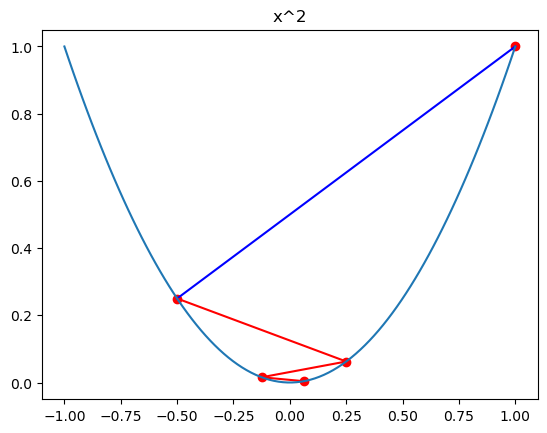

In [23]:
x = np.linspace(-1,1,100)
y = x**2
plt.title("x^2")
plt.scatter(1,1,color='r')
plt.scatter(-0.5,0.25,color='r')
plt.scatter(0.25,0.25**2,color='r')
plt.scatter(0.25-3/8,(0.25-3/8)**2,color='r')
plt.scatter((0.25-3/8)+3/16,((0.25-3/8)+3/16)**2,color='r')
plt.plot([1,-0.5],[1,0.25],color='blue')
plt.plot([-0.5,0.25],[0.25,0.25**2],color='r')
plt.plot([0.25,0.25-3/8],[0.25**2,(0.25-3/8)**2],color='r')
plt.plot([0.25-3/8,0.25-3/8+3/16],[(0.25-3/8)**2,(0.25-3/8+3/16)**2],color='r')
plt.plot(x,y)

Let's do this in code with our rules

In [24]:
def function (x):
    return x**2
def epsilon( step ) :
    return (-1)**step*(3/2/step)
    
starting_point = 1
new_position = function(starting_point)
for i in range(1,7):
    step = new_position + epsilon(i)
    print(f"New step: {step}, new position: {function(step)}")
    new_position =step
# You can see some of the issues about underflow and overflow here

New step: -0.5, new position: 0.25
New step: 0.25, new position: 0.0625
New step: -0.25, new position: 0.0625
New step: 0.125, new position: 0.015625
New step: -0.175, new position: 0.030624999999999996
New step: 0.07500000000000001, new position: 0.0056250000000000015


As you can see every new step we are closer and closer to the the minimum. If you want to know why I stop there... well is because after that... it won't work any more hehe, but we are really close

This was really cool, we found a way to be closer to the minimum, but first, we had way much information that we have normally, we could see the graphs, we could alter each time we wanted the epsilon without any consequence, soooo, that would not work always. So what should we do? Well we are going to use a very studied and well define concept, the derivative 

The derivative as you might know defines how a function behaves in a point, if you take the normal definition is the slope of the line that passes through that point and no other in its locality. So for example in our example, the derivative is 
$$f'(x) = 2x$$
and thus the slope in (1,1)
$$f'(1) = 2$$
we could graph that line 

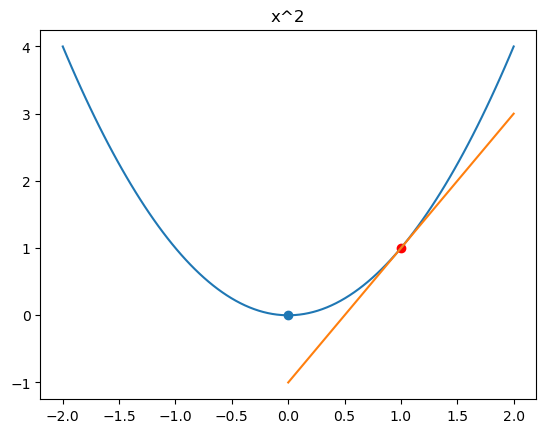

In [25]:
x = np.linspace(-2,2,100)
y = x**2
x_t = np.linspace(-0,2,100)
y_t = x_t*2- 1

plt.title("x^2")
plt.scatter(1,1,color='r')
plt.scatter(0,0)
plt.plot(x,y)
plt.plot(x_t,y_t)

As you can see the derivative is special, and you know it could be very useful in our problem because of what we just said "it shows the beviour of the function in a single point"
So what? well that means that we know that for points near of our original point, the function will behave the same, you can do this with this approximation
$$f(x+\epsilon) = f(x) +\epsilon f'(x)$$
What that means, that for very very small $\epsilon's$ we can make this approximation

And with that I think you know that is next part, using the properties of the derivative in our search of the minimum, defining our epsilon as such, 
$$f(x - \epsilon*f'(x))$$
right now we just have to have a sufficiently small $\epsilon$, let's use in this case 0.1

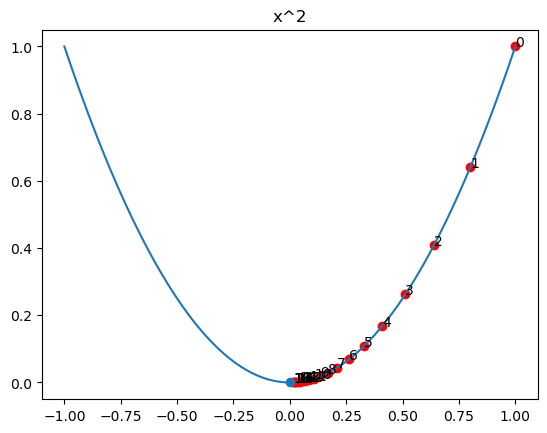

In [226]:
def function(x):
    return x**2
def derivative(i):
    return 2*i
x = np.linspace(-1,1,100)
y = function(x)
plt.title("x^2")
current_x = 1
epsilon = 0.1
for i in range(20):
    plt.scatter(current_x,function(current_x),color='r')
    plt.text(current_x,function(current_x),f"{i}")
    current_x -=  derivative(current_x)*epsilon
plt.scatter(0,0)
plt.plot(x,y)

We found a way to manage this, then let's work with some examples and some cases that might happen, let's suppose we have now another function
$$f(x) = x^3$$

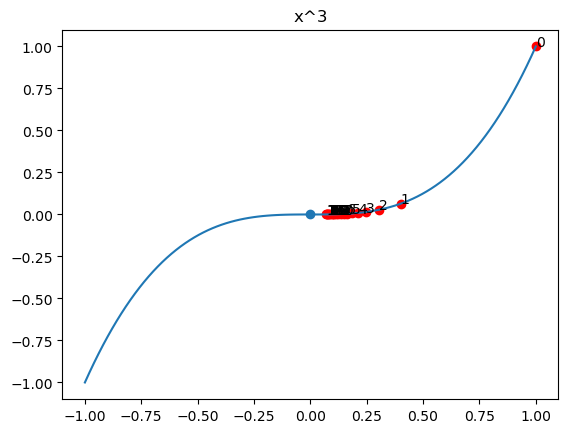

In [223]:
def function(x):
    return x**3
def derivative(i):
    return 3*i**2
x = np.linspace(-1,1,100)
y = function(x)
plt.title("x^3")
current_x = 1
epsilon = 0.2
for i in range(20):
    plt.scatter(current_x,function(current_x),color='r')
    plt.text(current_x,function(current_x),f"{i}")
    sign = 1 if(derivative(current_x)>0) else -1
    current_x -= derivative(current_x)*epsilon
plt.scatter(0,0)
plt.plot(x,y)

Okay that's great, we started at (1,1) and we got there, now let's start in (-1,-1) and see what happens

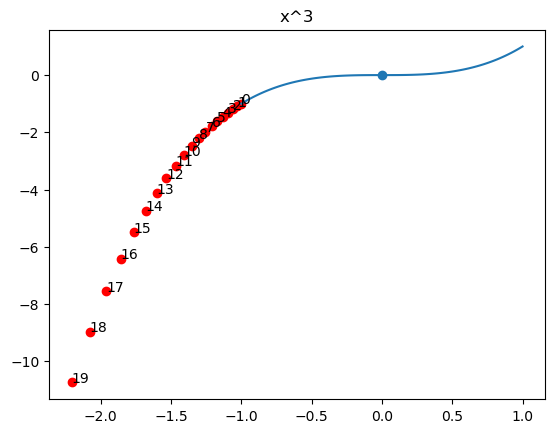

In [222]:
def function(x):
    return x**3
def derivative(i):
    return 3*i**2
x = np.linspace(-1,1,100)
y = function(x)
plt.title("x^3")
current_x = -1
epsilon = 0.01
for i in range(20):
    plt.scatter(current_x,function(current_x),color='r')
    plt.text(current_x,function(current_x),f"{i}")
    sign = 1 if( derivative(current_x)>0) else -1
    current_x -= derivative(current_x)*epsilon
plt.scatter(0,0)
plt.plot(x,y)

Perfect as you can see we are still reaching the minimum. If the minimum is the negative infinite... we have reach some difficulties with our algorithm, and also of what we called a saddle point, there are 3 possible cases for when $$f'(x)=0$$, actually 5, but we are going to consider two pairs of them as similar

# Minimum (local minimum)
We have a minimum on x when we have a $\epsilon>0$
$$f'(x-\epsilon)<f'(x)=0<f'(x+\epsilon)$$

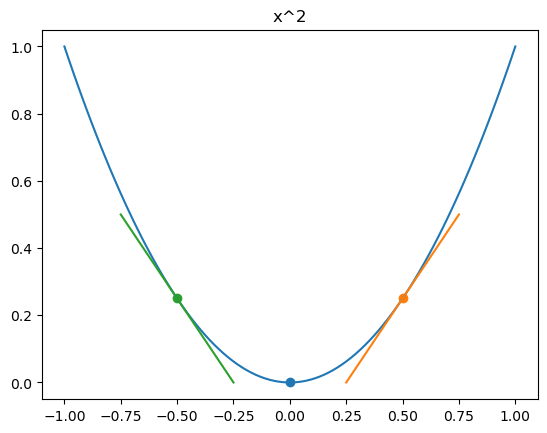

In [61]:
def function(x):
    return x**2
def derivative(i):
    return 2*i
x = np.linspace(-1,1,100)
y = function(x)
plt.title("x^2")
current_x = 1
epsilon = 0.2
plt.scatter(0,0)
plt.plot(x,y)
x = np.linspace(0.25,0.75,100)
y = x-0.25
plt.scatter(0.5,0.25)
plt.plot(x,y)
x = -np.linspace(0.25,0.75,100)
y = -x-0.25
plt.plot(x,y)
plt.scatter(-0.5,0.25)

As you can see both tangent lines that are before and after the minimum change the sign of the slope, meaning the derivative sufficies the condition.

# Maximum (local maximum)
We have a minimum on x when we have a $\epsilon>0$
$$f'(x-\epsilon)>f'(x)=0>f'(x+\epsilon)$$

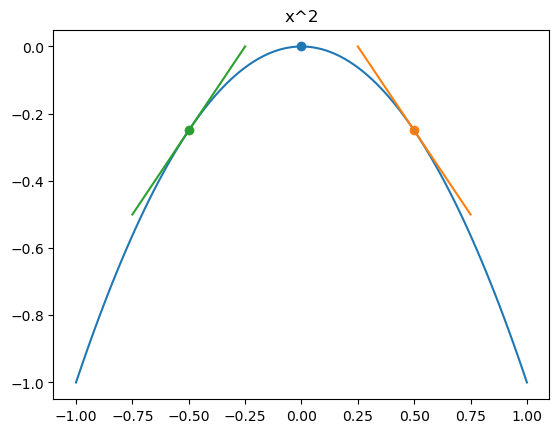

In [65]:
def function(x):
    return -x**2
def derivative(i):
    return -2*i
x = np.linspace(-1,1,100)
y = function(x)
plt.title("x^2")
current_x = 1
epsilon = 0.2
plt.scatter(0,0)
plt.plot(x,y)
x = np.linspace(0.25,0.75,100)
y = -x+0.25
plt.scatter(0.5,-0.25)
plt.plot(x,y)
x = -np.linspace(0.25,0.75,100)
y = x+0.25
plt.plot(x,y)
plt.scatter(-0.5,-0.25)

Now the contrary happens also for the maximum, they change the direction of the slope, but for being positive to negative
You can try if you want going to point closer and closer to the maximum but all the points before and after the maximum (with some limitation :D ) will suffice the condition. 

Why some limitations?, because there are some cases when we ca have other minimums, or what we called local minimums, let's check this case

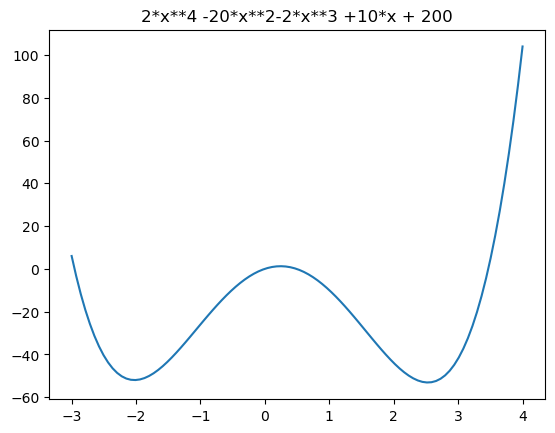

In [101]:
def function(x):
    return 2*x**4 -20*x**2-2*x**3 +10*x 
def derivative(i):
    return 3*i**2
x = np.linspace(-3,4,100)
y = function(x)
plt.title("2*x**4 -20*x**2-2*x**3 +10*x + 200")
current_x = 1
epsilon = 0.2
plt.plot(x,y)

This might look like a weird function, but... do you see that there are two points that can have the same characteristics as we describe of being minimums I am going to teach you right now on how to get the minimums in python also :D 

In [184]:
# This is symbolic computation, if you want to talk more about this let me know :D
from sympy import real_roots
from sympy.abc import x
from sympy import Poly
f = Poly ( 2*x**4-20*x**2-2*x**3+10*x )
print(f)
d = f.diff(x) 
print(d)
r = real_roots(d)
mins  = []
for i in r:
    print(i, i.evalf())
    mins.append(i.evalf())
print(mins)

Poly(2*x**4 - 2*x**3 - 20*x**2 + 10*x, x, domain='ZZ')
Poly(8*x**3 - 6*x**2 - 40*x + 10, x, domain='ZZ')
CRootOf(4*x**3 - 3*x**2 - 20*x + 5, 0) -2.02459035045607
CRootOf(4*x**3 - 3*x**2 - 20*x + 5, 1) 0.243975861471332
CRootOf(4*x**3 - 3*x**2 - 20*x + 5, 2) 2.53061448898474
[-2.02459035045607, 0.243975861471332, 2.53061448898474]


-2.02459035045607
0.243975861471332
2.53061448898474


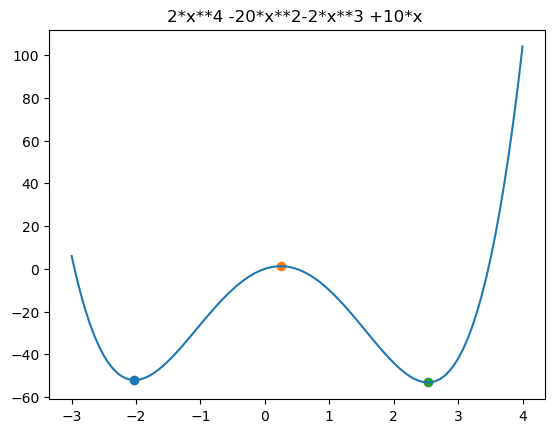

In [191]:
def function(a):
    return 2*a**4 -20*a**2-2*a**3 +10*a 
def derivative(i):
    return 3*i**2
x = np.linspace(-3,4,100)
y = function(x)
plt.title("2*x**4 -20*x**2-2*x**3 +10*x ")
current_x = 1
epsilon = 0.2
for i in mins:
    print(i)
    a = [i,function(i)]
    plt.scatter(a[0],a[1])
plt.plot(x,y)

As you can see the blue dot and the green dot both have the same characteristics for being the minimum, if you want I can show you the slopes 

-2.02459035045607
0.243975861471332
2.53061448898474


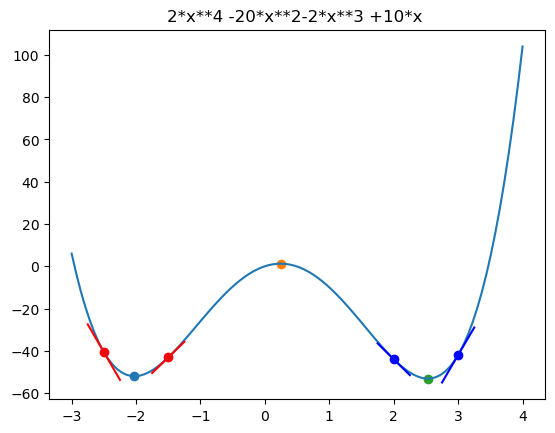

In [212]:
def function(a):
    return 2*a**4 -20*a**2-2*a**3 +10*a 
def derivative(i):
    return 8*i**3 - 6*i**2 -40*i + 10
def line(x, x1, y1):
    return derivative(x1)*(x - x1) + y1
x = np.linspace(-3,4,100)
y = function(x)
plt.title("2*x**4 -20*x**2-2*x**3 +10*x ")
current_x = 1
epsilon = 0.2
for i in mins:
    print(i)
    a = [i,function(i)]
    plt.scatter(a[0],a[1])
plt.plot(x,y)

def plot_line_and_dot(a,delta=0.25,color="r"):
    x = np.linspace(a-delta,a+delta,100)
    plt.plot(x, line(x, a, function(a)),color=color)
    plt.scatter(a, function(a),color=color)

plot_line_and_dot(-2.5)
plot_line_and_dot(-1.5)
plot_line_and_dot(3,color="b")
plot_line_and_dot(2,color="b")

As you can see both are what we called local minimums, points in the graph that sufficies the characteristics of being minimums but they might or they might not be the global minimum. In a broader sense if we are standing in a point like this is impossible to know if there are the global minimum, but most often that not, we can use them. (it could be the case that even the global minimum is innacesible so we are going to use this) So what happens know? Well first we are going to check what would our algorithm for finding the minimum would do in cases like this 

Text(-3, 90, 'E Marks the ending point for each point')

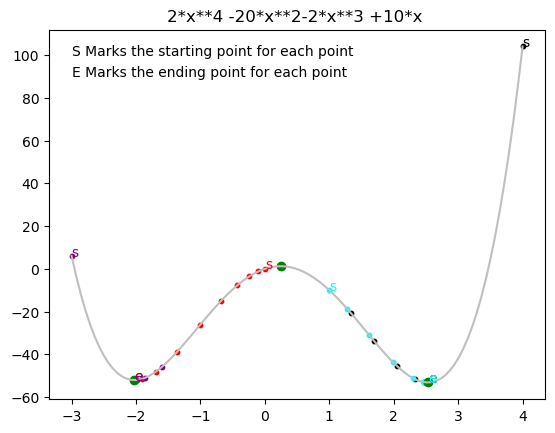

In [272]:
def function(a):
    return 2*a**4 -20*a**2-2*a**3 +10*a 
def derivative(i):
    return 8*i**3 - 6*i**2 -40*i + 10
def line(x, x1, y1):
    return derivative(x1)*(x - x1) + y1
x = np.linspace(-3,4,100)
y = function(x)
plt.title("2*x**4 -20*x**2-2*x**3 +10*x ")
current_x = 1
epsilon = 0.2
def find_minimum(f,d,starting_x,epsilon=0.01,n=20,color="r"):
    current_x = starting_x
    for i in range(n):
        if(not i):
            plt.text(current_x,f(current_x),"s",color=color)
        if( i==n-1):
            plt.text(current_x,f(current_x),"e",color=color)
        plt.scatter(current_x,f(current_x),color=color,s=int(200/n))
        current_x -= derivative(current_x)*epsilon
plt.plot(x,y,color ="0.75")
find_minimum(function,derivative,0)
find_minimum(function,derivative,4,color="black")
find_minimum(function,derivative,-3,color="purple")
find_minimum(function,derivative,1,color="cyan")

for i in mins:
    a = [i,function(i)]
    plt.scatter(a[0],a[1],color="green")
plt.text(-3,100,"S Marks the starting point for each point")
plt.text(-3,90,"E Marks the ending point for each point")


As you can see, all of the points are working as intended, they are going to the minimum... but wherever you start you are going to get different minimums, in this case might not look as important  that is a big thing to consider when choosing your starting point, let's go a little bit further, what happens when we have this function?

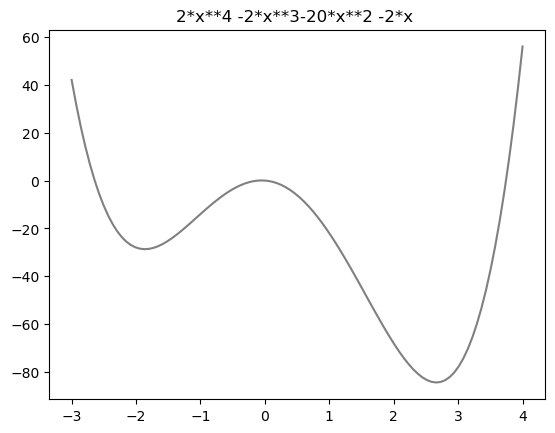

In [313]:
def function(a):
    return 2*a**4 -20*a**2-2*a**3 -2*a 
def derivative(i):
    return 8*i**3 - 6*i**2 -40*i + 10
def line(x, x1, y1):
    return derivative(x1)*(x - x1) + y1
def plot_function(f,x_0,x_e,color="0.5",title=""):
    x = np.linspace(x_0,x_e,100)
    y = f(x)
    plt.title(title)
    plt.plot(x,y,color =color)
    
plot_function(function,-3,4,title="2*x**4 -2*x**3-20*x**2 -2*x ")

First let's get the minimums, but as you can see we are going to have a big problem...

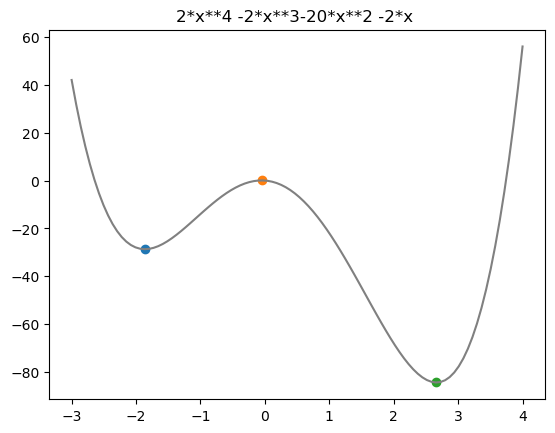

In [283]:
from sympy.abc import x
f = Poly ( 2*x**4-20*x**2-2*x**3-2*x )
def get_mins(f):
    d = f.diff(x) 
    r = real_roots(d)
    mins  = []
    for i in r:
        mins.append(i.evalf())
    for i in mins:
        a = [i,function(i)]
        plt.scatter(a[0],a[1])
plot_function(f,-3,4)
get_mins(f)

As you can see there are 2 points, the blue and the green that are minimums, but... it is very clear that green point is lower that the blue one, if we do the process... something is going to happen

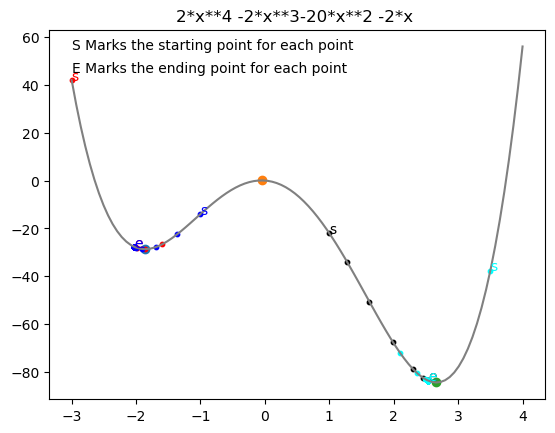

In [293]:
plot_function(f,-3,4)
get_mins(f)
plt.text(-3,55,"S Marks the starting point for each point")
plt.text(-3,45,"E Marks the ending point for each point")
find_minimum(f,f.diff(x),-3)
find_minimum(f,f.diff(x),-1,color="blue")
find_minimum(f,f.diff(x),1,color="black")
find_minimum(f,f.diff(x),3.5,color="cyan")

Maybe you can see that if we start in the left side of the yellow point (local maximum) then they go to the point in blue, but in other case, they go to the green one. We want the green one, If we reach the blue point, we are going to be stuck there. How can we manage this... well this is actually kinda of tricky, there is no best solution but there are many techniques, after some time we are going to inmerse ourselves in optimizers, that would be a great way to understand how they work, until now we just have to be councious of this possible issue :D 
# Saddle points
Do you remember $x^3$, really nice function hehe, but we reach what we called a saddle point this is when

$$f'(x-\epsilon)>f'(x)=0<f'(x+\epsilon)$$
$$f'(x-\epsilon)<f'(x)=0>f'(x+\epsilon)$$
Meaning they both have the same sign for the slope for a point before or after the critical point, we want to be sure to identify this case as we know we haven't reach a minimum or maximum, just a critical point...

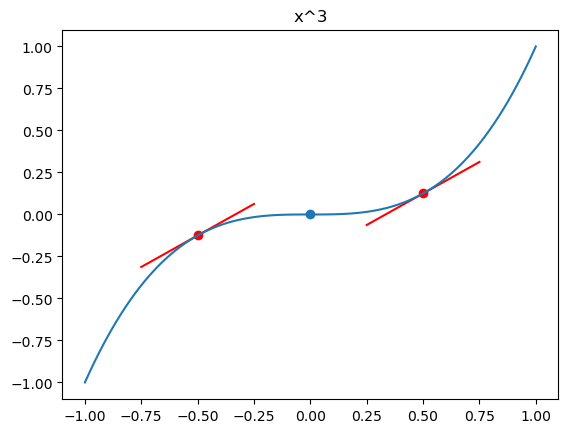

In [300]:
def function(x):
    return x**3
def derivative(i):
    return 3*i**2
x = np.linspace(-1,1,100)
y = function(x)
plt.title("x^3")
current_x = 1
epsilon = 0.2
plot_line_and_dot(0.5)
plot_line_and_dot(-0.5)
plt.scatter(0,0)
plt.plot(x,y)

Okay so we have the idea of what is the purpose of the derivative in this process, we can go for the next step. We have been only talking about functions that are only define by one variable
$$f(x)$$
But what happens when we have a function that is define by various variables? well in that case we are going to use partial derivatives, do you remember what we say the derivative is, "The derivative helps us understand the behaviour of the function around one point" well let's add to add something to understand the partial derivative, "The partial derivative helps us understand the behaviour of the function from  the perspective of one variable around one point"... I am going to give you an interesting example, do you remember the first function $x^2$

<function <lambda> at 0x71683ef35ee0>


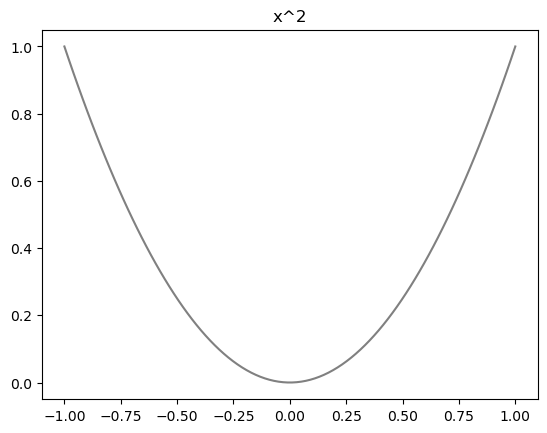

In [316]:
f = lambda x :x**2
d = lambda x :2*x
print(d)
plot_function(f,-1,1,title="x^2")

suppose that we have this function $f(x,y)=x^2$, this might feel the same, but... we have another variable, so first are not going to be able to graph it only in two dimensions, so right now we are going to start working with a tri-dimensional plot

Text(0.5, 0.92, 'f(x,y)= x**2')

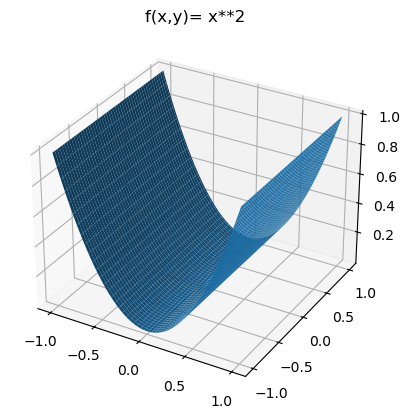

In [344]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2

surf = ax.plot_surface(x,y,z)
ax.set_title("f(x,y)= x**2")

It looks kinda of the same right?... Well you know what, if we change the perspective is actually the same

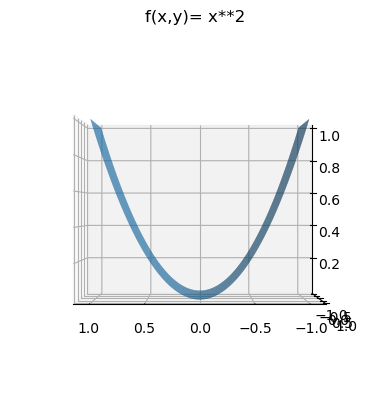

In [353]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2

surf = ax.plot_surface(x,y,z)
ax.set_title("f(x,y)= x**2")
ax.view_init(elev=0, azim=90) 

In this case we are just seeing the x perspective of the graph right..., welll the x perspective of the graph  is our original function, is like we were doing that f(x,y=0) = f(x)
So we know that using the x perspective we have the same behaviour as our first function. Is that reflected in getting the minimum? Yes!!!! First we can see that there are many minimums for this function, for example the coordinates $(0,1),(0,2),(0,5)$,etc. Is interesting as we can see that all the line where x = 0 and y any value is a minimum of this function

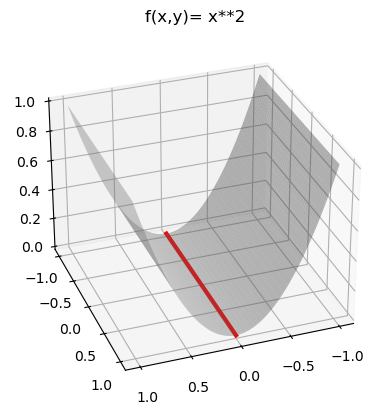

In [488]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2
surf = ax.plot_surface(x,y,z,color="gray",alpha=0.4)
plt.plot([0,0],[-1,1],[0,0],color="r",linewidth=3)

ax.set_title("f(x,y)= x**2")
ax.view_init(elev=30, azim=70) 

It might be difficult to see but that red line are all minimums, so how from any point in the function can we reach that line... well we know how it looks from the perspective from x, can we use what we just learn to reach that line?... yes!!!  isn't that amazing? we can start on any point and then move a little by little in x to reach that line, suppose we start when x=1 and y=1

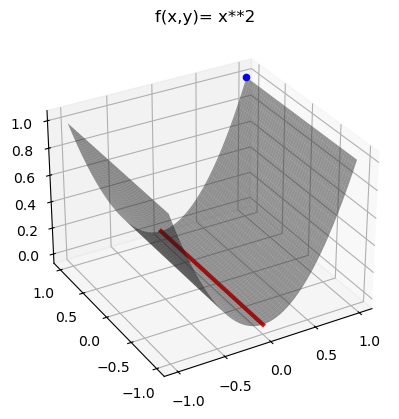

In [486]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2
surf = ax.plot_surface(x,y,z,color="0.2",alpha=0.5)
plt.plot([0,0],[-1,1],[0,0],color="r",linewidth=3)
ax.scatter(1,1,1,color="blue",s=20)

ax.set_title("f(x,y)= x**2")
ax.view_init(elev=30, azim=-120) 

Let's change the perspective 

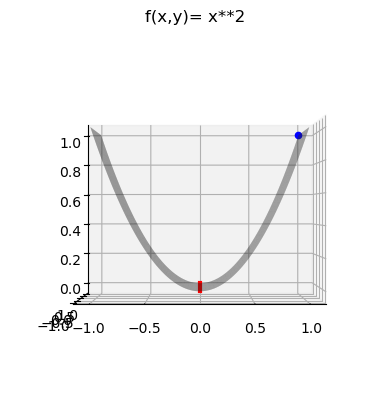

In [489]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2
surf = ax.plot_surface(x,y,z,color="0.2",alpha=0.5)
plt.plot([0,0],[-1,1],[0,0],color="r",linewidth=3)
ax.scatter(1,1,1,color="blue",s=20)

ax.set_title("f(x,y)= x**2")
ax.view_init(elev=0, azim=-90) 

As you can see... is the same, if we where to use our optimizing algorithm we could use the same process, and in order of being cool hehe I am going to plot side by side

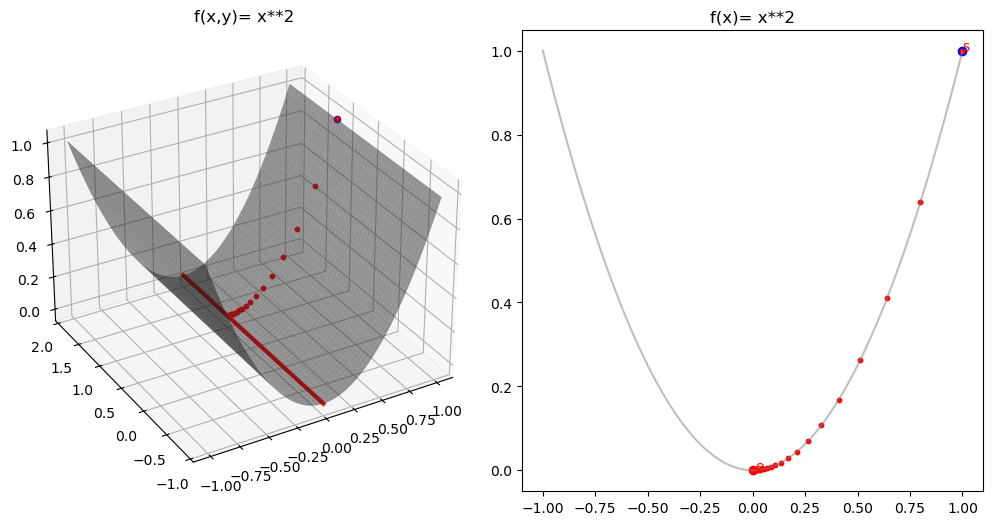

In [497]:
fig, (ax,d2) = plt.subplots(ncols=2,figsize=(10,10))
ax.remove()
ax = fig.add_subplot(1,2,1,projection='3d')


x = np.linspace(-1,1,100)
y = np.linspace(-1,2,100)
x,y = np.meshgrid(x,y)
z = x**2

surf = ax.plot_surface(x,y,z,color="0.2",alpha=0.5)
ax.plot([0,0],[-1,2],[0,0],color="r",linewidth=3)
ax.scatter(1,1,1,color="blue",s=20)
ax.set_title("f(x,y)= x**2")
ax.view_init(elev=30, azim=-120) 

x = np.linspace(-1,1,100)
d2.plot(x , x**2,color="gray",alpha=0.5)
d2.scatter(1,1,color="blue")
d2.scatter(0,0,color="red")
d2.set_title("f(x)= x**2")
d2.set_box_aspect(1)

def find_minimum(f,d,starting_x,ax,d2,epsilon=0.01,n=20,color="r"):
    current_x = starting_x
    for i in range(n):
        if(not i):
            d2.text(current_x,f(current_x),"s",color=color)
        if( i==n-1):
            d2.text(current_x,f(current_x),"e",color=color)
        d2.scatter(current_x,f(current_x),color=color,s=int(200/n))
        ax.scatter(current_x,1,f(current_x),color=color,s=int(200/n))
        
        current_x -= d(current_x)*epsilon
def f(i):
    return i**2
def d(i):
    return i*2
find_minimum(f,d,1,ax,d2,epsilon=0.1)
ax.set_ylim([-1,2])

plt.tight_layout()

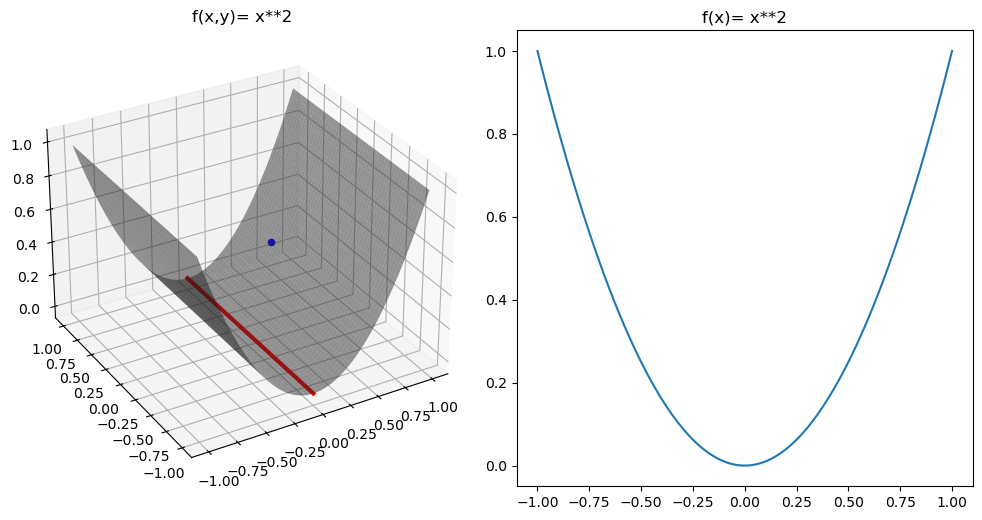

In [446]:
fig, (ax,d2) = plt.subplots(ncols=2,figsize=(10,10))
ax.remove()
ax = fig.add_subplot(1,2,1,projection='3d')


x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
x,y = np.meshgrid(x,y)
z = x**2

surf = ax.plot_surface(x,y,z,color="0.2",alpha=0.5)
ax.plot([0,0],[-1,1],[0,0],color="r",linewidth=3)
ax.scatter(0.5,0.5,0.25,color="blue",s=20)
ax.set_title("f(x,y)= x**2")
ax.view_init(elev=30, azim=-120) 

x = np.linspace(-1,1,100)
d2.plot(x , x**2,color="gray",alpha=0.5)
d2.scatter(0.5,0.25,color="blue")
d2.scatter(0,0,color="red")
d2.set_title("f(x)= x**2")
d2.set_box_aspect(1)


plt.tight_layout()